In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
data = pd.read_csv("Data Covid19.csv")
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Province/State  173972 non-null  object
 1   Country/Region  236017 non-null  object
 2   Last Update     236017 non-null  object
 3   Confirmed       236017 non-null  int64 
 4   Deaths          236017 non-null  int64 
 5   Recovered       236017 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 10.8+ MB


In [32]:
data['Last Update'].unique()

array(['1/22/2020 17:00', '1/23/20 17:00', '1/24/20 17:00', ...,
       '26/02/2021 05.22', '27/02/2021 05.22', '28/02/2021 05.22'],
      dtype=object)

In [33]:
up_date = '27/02/2021 05.22'
data[data['Last Update']==up_date]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
234489,NaN,Afghanistan,27/02/2021 05.22,55696,2442,49285
234490,NaN,Albania,27/02/2021 05.22,105229,1756,68007
234491,NaN,Algeria,27/02/2021 05.22,112805,2977,77842
234492,NaN,Andorra,27/02/2021 05.22,10822,110,10394
234493,NaN,Angola,27/02/2021 05.22,20759,504,19307
...,...,...,...,...,...,...
235248,Zaporizhia Oblast,Ukraine,27/02/2021 05.22,69338,1122,64927
235249,Zeeland,Netherlands,27/02/2021 05.22,16396,177,0
235250,Zhejiang,Mainland China,27/02/2021 05.22,1321,1,1314
235251,Zhytomyr Oblast,Ukraine,27/02/2021 05.22,50076,827,44173


In [35]:
unique_countries = data[data.Confirmed>0]['Country/Region'].unique()
unique_countries.sort()
unique_countries

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'F

In [36]:
country_confirmed_case = []
for i in unique_countries:
  country_confirmed_case.append(data[data.Confirmed>0][data['Country/Region']==i][data['Last Update']==up_date].Confirmed.sum())

<ipython-input-36-755192df1793>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.Confirmed>0][data['Country/Region']==i][data['Last Update']==up_date].Confirmed.sum())


In [37]:
print(set(zip(unique_countries, country_confirmed_case)))

{('Bosnia and Herzegovina', 130979), ('Iraq', 688698), ('Colombia', 2244792), ('Vietnam', 2426), ('Madagascar', 19831), ('Cayman Islands', 0), ('Bahamas', 8519), ('Gabon', 14564), ('Republic of Ireland', 0), ('Belize', 12293), ('Cameroon', 35714), ('Dominica', 142), ('Palestine', 0), ('Canada', 866667), ('Guernsey', 0), ('Japan', 429873), ('Hungary', 419182), ('Moldova', 183338), ('Morocco', 482994), ('North Macedonia', 101762), ('Panama', 339781), ('UK', 4175315), ('Botswana', 28371), ('Mauritius', 610), ('Micronesia', 1), ('Samoa', 3), ('Kosovo', 68451), ('Aruba', 0), ('Guam', 0), ('Bhutan', 867), ('Cabo Verde', 15253), ('Azerbaijan', 233989), ('Mozambique', 58218), ('Bulgaria', 245627), ('Grenada', 148), ('Hong Kong', 10950), ('Niger', 4740), ('Portugal', 802773), ('Mongolia', 2866), ('Pakistan', 578797), ('Armenia', 171510), ('Benin', 5434), ('Zimbabwe', 36044), ('Senegal', 34031), ('Kazakhstan', 261244), ('French Guiana', 0), ('Antigua and Barbuda', 701), ('Diamond Princess', 712)

In [38]:
unique_provinces = data['Province/State'][data.Confirmed>1].unique()
unique_provinces

array(['Beijing', 'Chongqing', 'Guangdong', 'Guangxi', 'Hainan', 'Henan',
       'Hubei', 'Hunan', 'Jiangxi', 'Liaoning', 'Shandong', 'Shanghai',
       'Sichuan', 'Tianjin', 'Zhejiang', nan, 'Anhui', 'Fujian', 'Gansu',
       'Guizhou', 'Heilongjiang', 'Hong Kong', 'Jiangsu', 'Macau',
       'Shaanxi', 'Xinjiang', 'Yunnan', 'Jilin', 'Taiwan', 'Ningxia',
       'Hebei', 'Inner Mongolia', 'Shanxi', 'California', 'Qinghai',
       'New South Wales', 'Bavaria', 'Ontario', 'Victoria', 'Queensland',
       'Illinois', 'Chicago, IL', 'South Australia', 'San Benito, CA',
       'Santa Clara, CA', 'Toronto, ON', 'British Columbia',
       'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'Ashland, NE', 'Travis, CA',
       'From Diamond Princess', 'Lackland, TX',
       'Omaha, NE (From Diamond Princess)',
       'Travis, CA (From Diamond Princess)',
       'Lackland, TX (From Diamond Princess)',
       'Unassigned Location (From Diamond Princess)', 'None',
       '

In [39]:
province_confirmed_case = []
for i in unique_provinces:
  province_confirmed_case.append(data[data.Confirmed>0][data['Province/State']==i][data['Last Update']==up_date].Confirmed.sum())
  

<ipython-input-39-4ee5521ec1f5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_case.append(data[data.Confirmed>0][data['Province/State']==i][data['Last Update']==up_date].Confirmed.sum())


In [40]:
print(set(zip(unique_provinces, province_confirmed_case)))

{('Hubei', 68151), ('Kronoberg', 13899), ('Montana', 99613), ('Miyazaki', 1947), ('Illinois', 1183569), ('Karelia Republic', 40609), ('Miyagi', 3631), ('Ashland, NE', 0), ('Tyumen Oblast', 31137), ('Ivanovo Oblast', 30393), ('Ostergotland', 22855), ('Hiroshima', 5023), ('Islamabad', 44106), ('Puerto Rico', 99860), ('Sint Maarten', 2053), ('Mie', 2508), ('Zabaykalsky Krai', 38418), ('Vladimir Oblast', 27166), ('Arkhangelsk Oblast', 56408), ('United States Virgin Islands', 0), ('Floyd County, GA', 0), ('Murmansk Oblast', 46593), ('Quebec', 286145), ('Northern Mariana Islands', 143), ('Quindio', 31987), ('Friesland', 26015), ('Liguria', 77379), ('San Martin', 29555), ('Diamond Princess cruise ship', 49), ('Qinghai', 18), ('Massachusetts', 577980), ('Saratoga County, NY', 0), (nan, 0), ('Moscow', 974914), (' Norfolk County, MA', 0), ('North Dakota', 99711), ('Saratov Oblast', 49109), ('Yaroslavl Oblast', 32524), ('Tatarstan Republic', 17871), ('Orenburg Oblast', 37424), ('Shaanxi', 551), (

In [41]:
nan_indices = []
for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indices.append(i)

In [42]:
unique_provinces = list(unique_provinces)
province_confirmed_case = list(province_confirmed_case)

In [43]:
for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_case.pop(i)

unique_provinces

['Beijing',
 'Chongqing',
 'Guangdong',
 'Guangxi',
 'Hainan',
 'Henan',
 'Hubei',
 'Hunan',
 'Jiangxi',
 'Liaoning',
 'Shandong',
 'Shanghai',
 'Sichuan',
 'Tianjin',
 'Zhejiang',
 'Anhui',
 'Fujian',
 'Gansu',
 'Guizhou',
 'Heilongjiang',
 'Hong Kong',
 'Jiangsu',
 'Macau',
 'Shaanxi',
 'Xinjiang',
 'Yunnan',
 'Jilin',
 'Taiwan',
 'Ningxia',
 'Hebei',
 'Inner Mongolia',
 'Shanxi',
 'California',
 'Qinghai',
 'New South Wales',
 'Bavaria',
 'Ontario',
 'Victoria',
 'Queensland',
 'Illinois',
 'Chicago, IL',
 'South Australia',
 'San Benito, CA',
 'Santa Clara, CA',
 'Toronto, ON',
 'British Columbia',
 'Cruise Ship',
 'Diamond Princess cruise ship',
 'San Diego County, CA',
 'Ashland, NE',
 'Travis, CA',
 'From Diamond Princess',
 'Lackland, TX',
 'Omaha, NE (From Diamond Princess)',
 'Travis, CA (From Diamond Princess)',
 'Lackland, TX (From Diamond Princess)',
 'Unassigned Location (From Diamond Princess)',
 'None',
 'Sacramento County, CA',
 'Seattle, WA',
 'Western Australia',
 'S

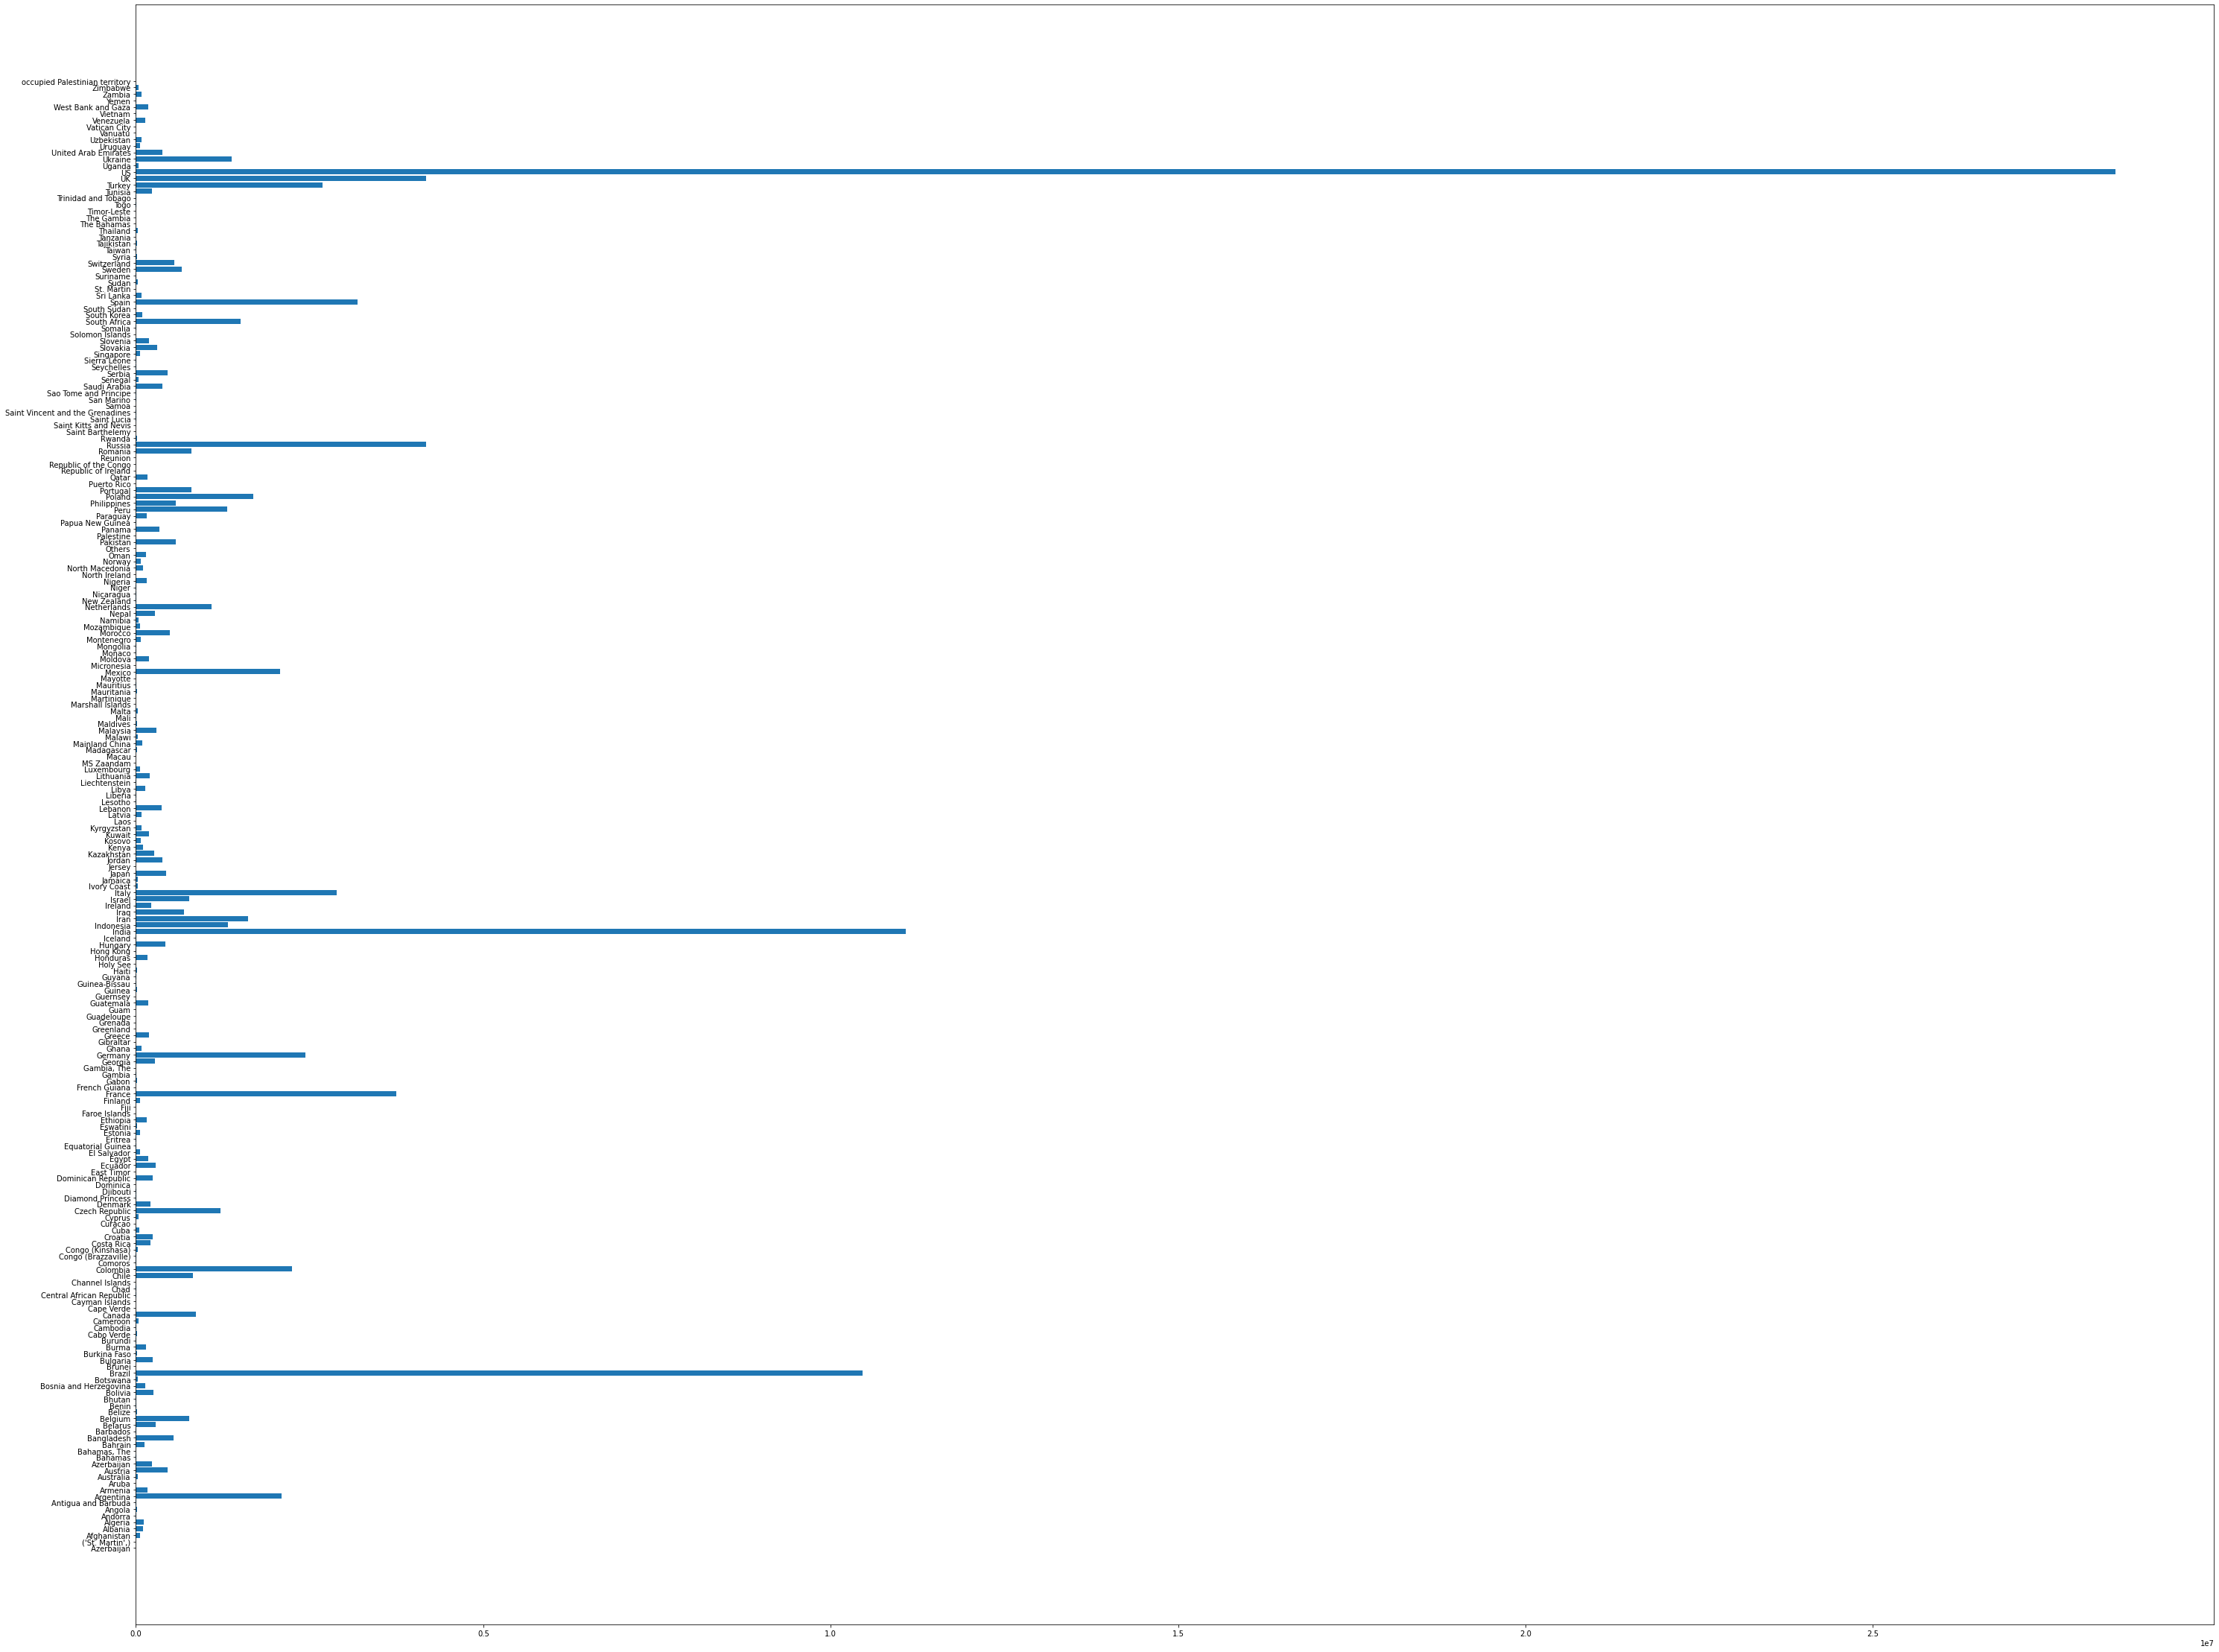

In [46]:
plt.figure(figsize=(50,40))
plt.barh(unique_countries, country_confirmed_case)
plt.show()

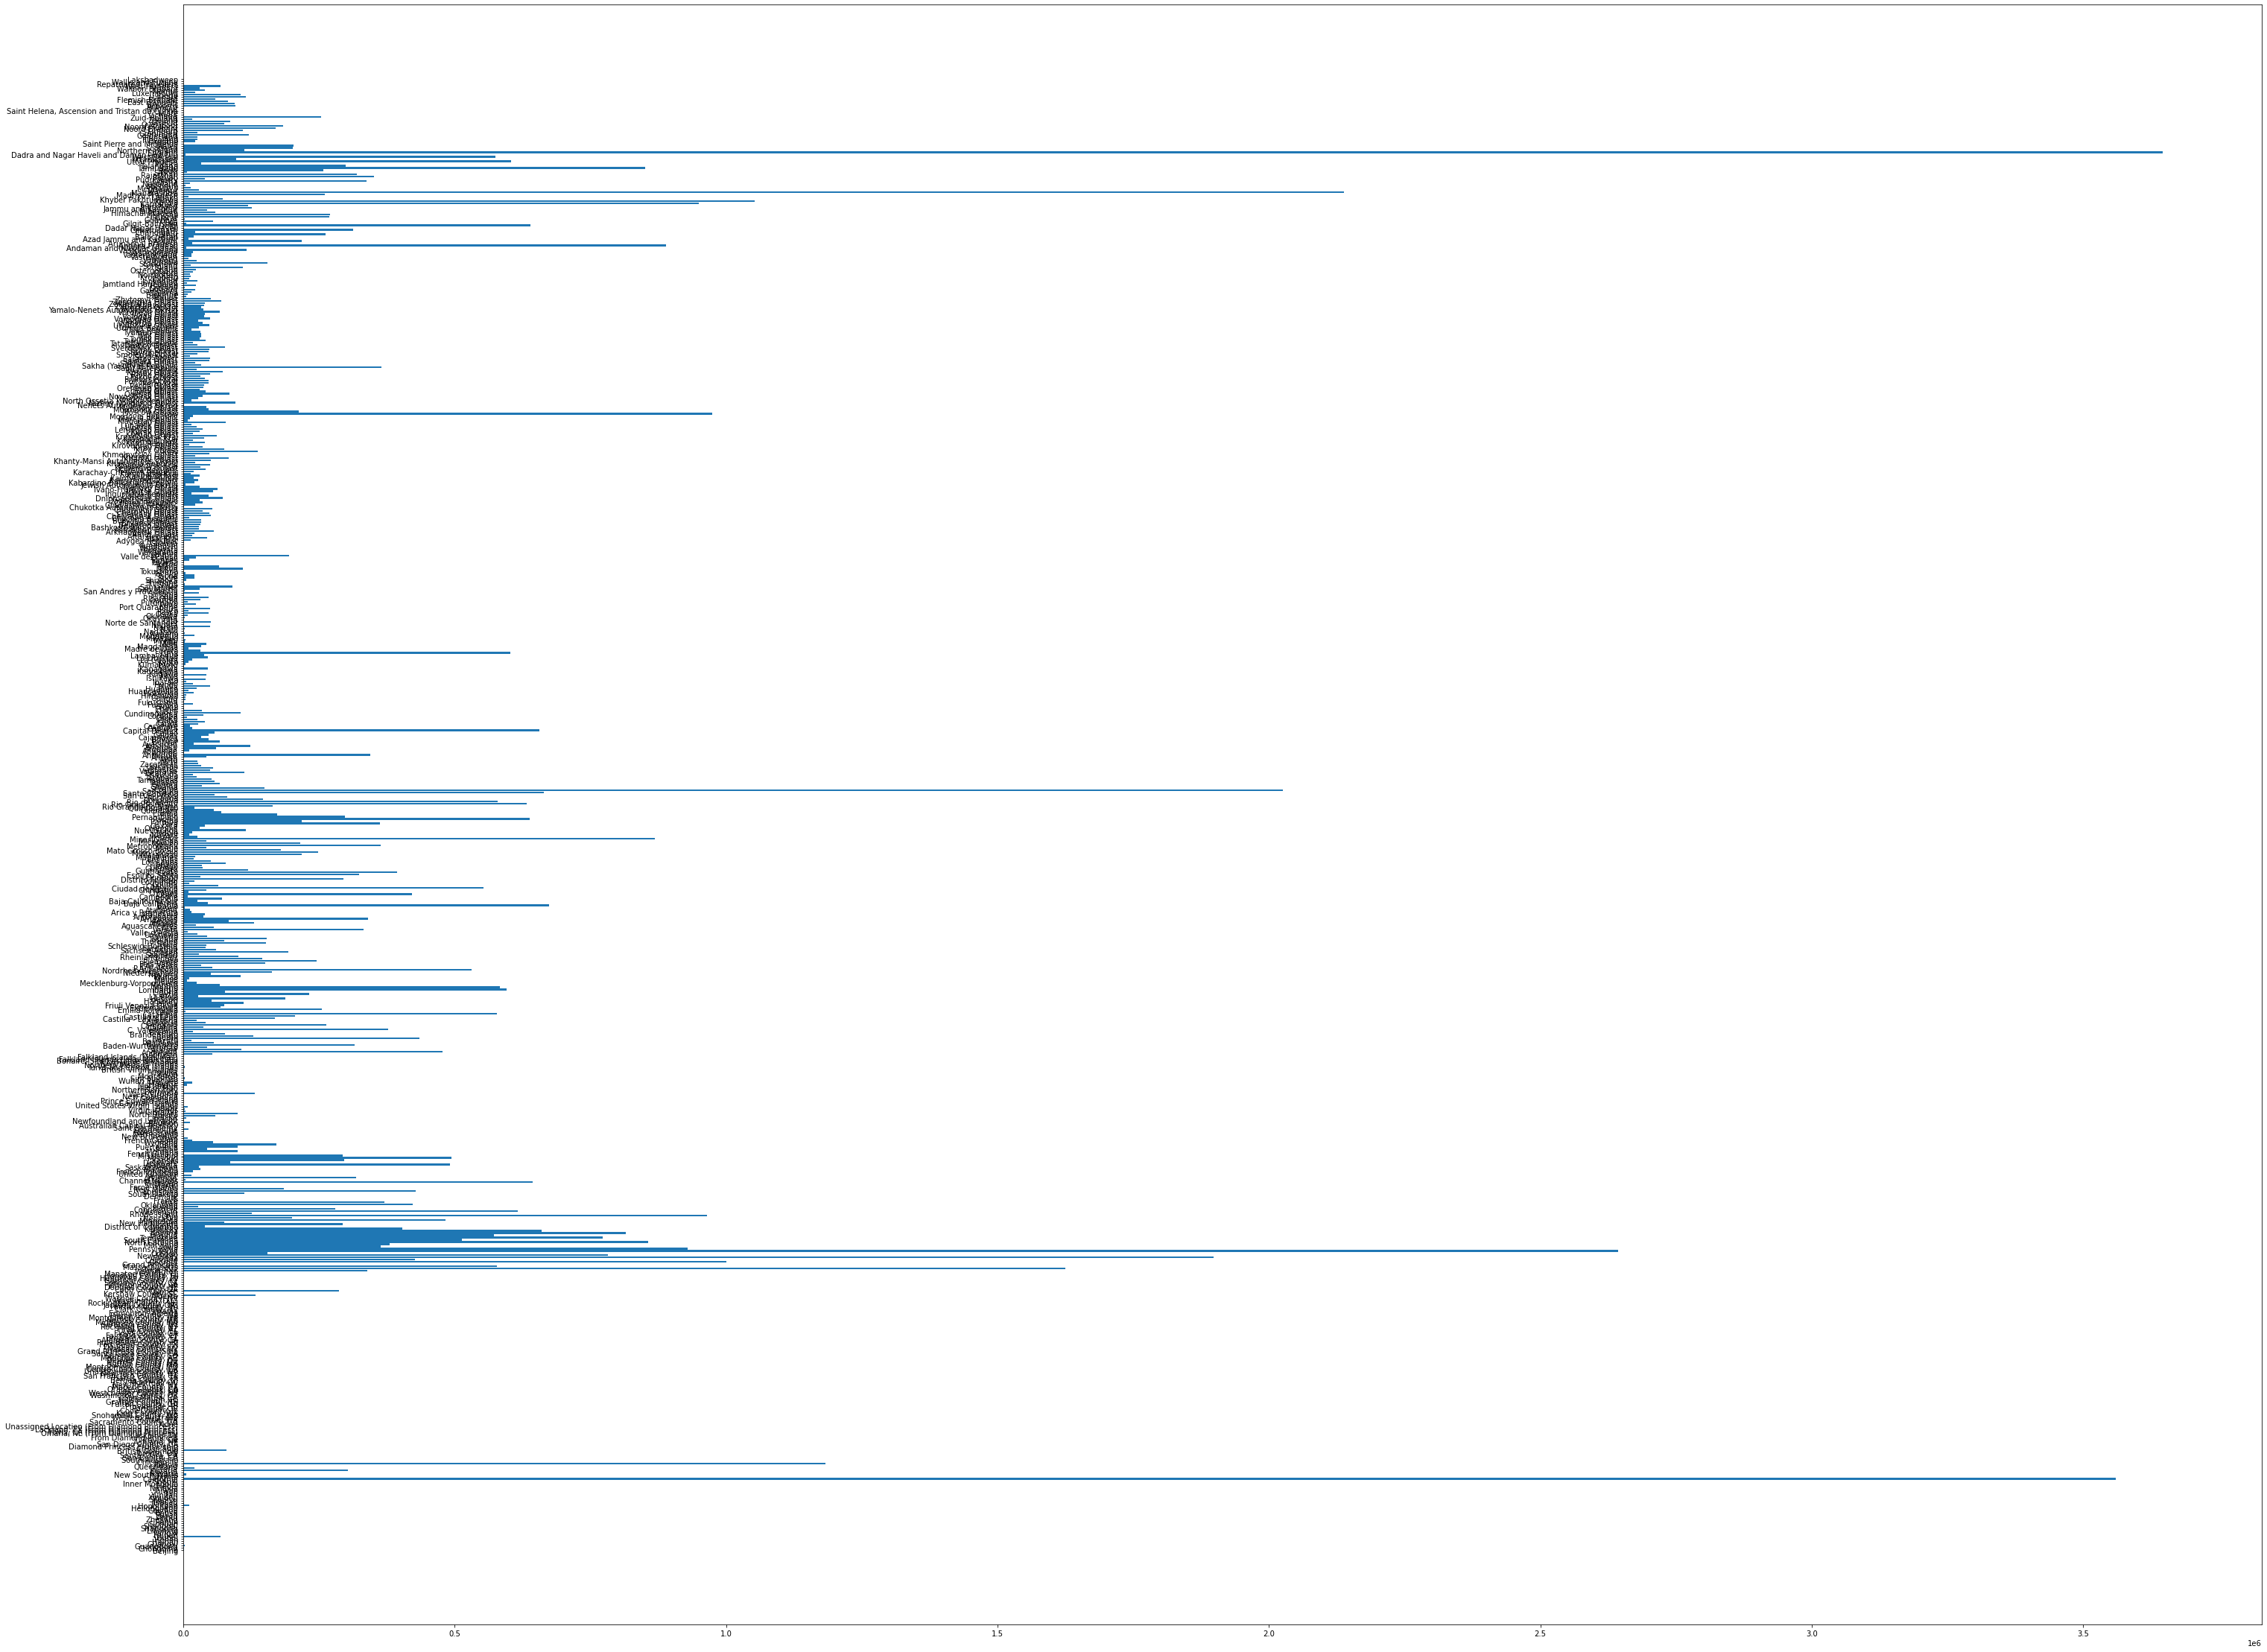

In [45]:
plt.figure(figsize=(50,40))
plt.barh(unique_provinces, province_confirmed_case)
plt.show()

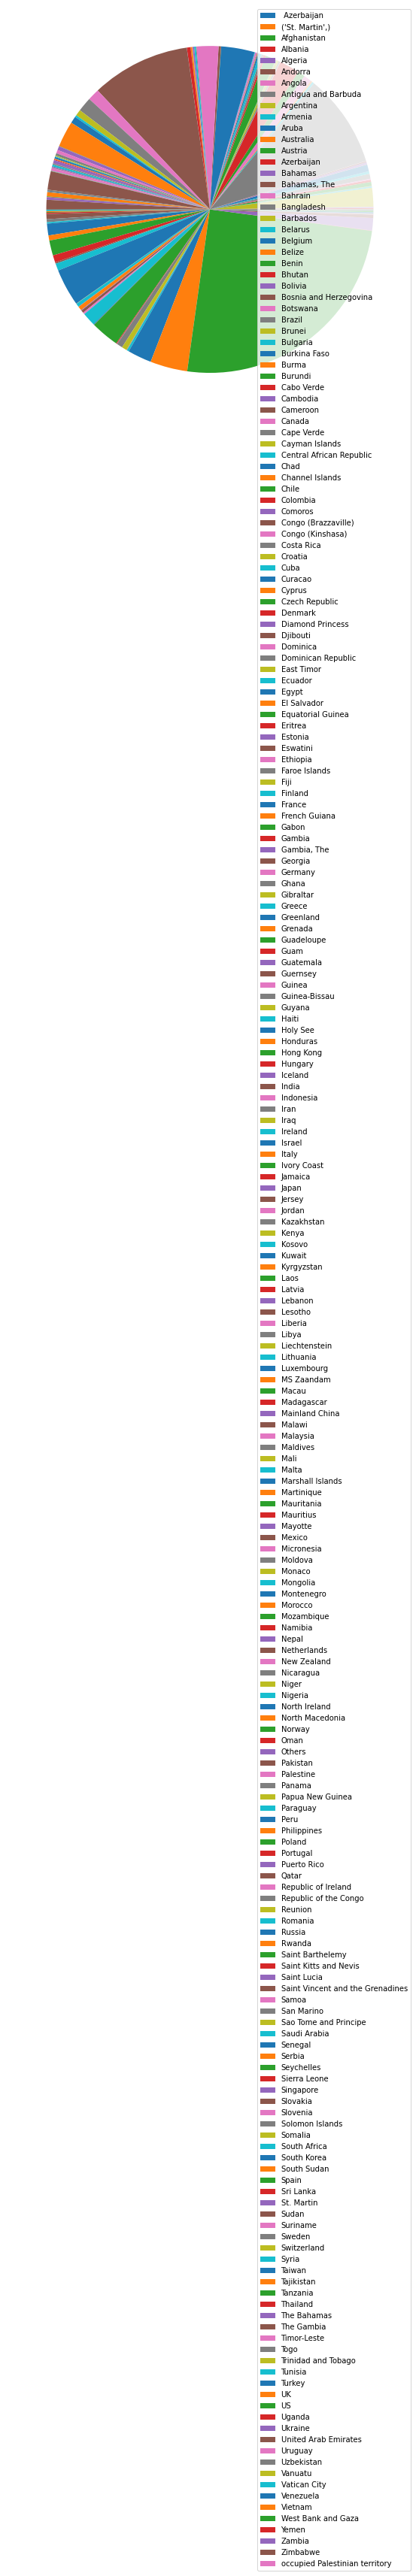

In [47]:
plt.figure(figsize=(10,10))
plt.pie(country_confirmed_case)
plt.legend(unique_countries, loc='best')
plt.show()

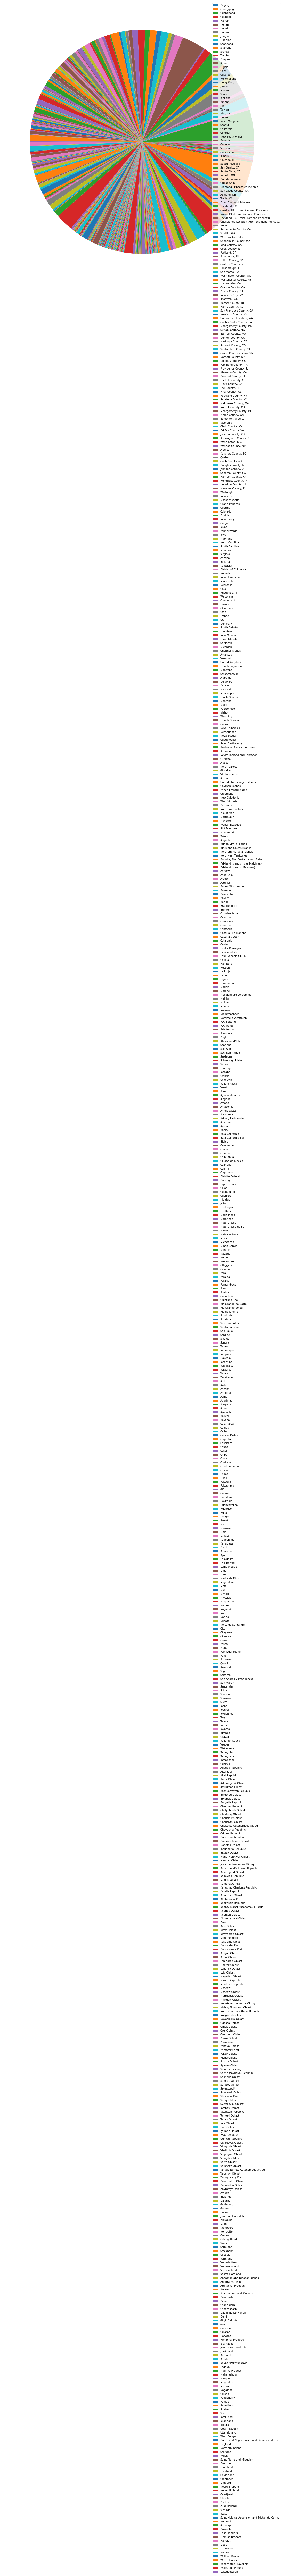

In [48]:
plt.figure(figsize=(20,20))
plt.pie(province_confirmed_case)
plt.legend(unique_provinces, loc='best')
plt.show()